# 🌾 AI-Based Crop Health Monitoring Using Drone Multispectral Data

---

## 🧩 Problem Statement

### What Problem Are We Solving?

Imagine you have a **HUGE farm** - so big that you can't walk to every plant to check if it's healthy. Some plants might be:
- 💧 Thirsty (need water)
- 🤒 Sick (have disease)
- ☀️ Not getting enough sunlight

**How do you find the sick plants in such a big farm?**

### Solution: AI + Drones!

We use a **flying robot (drone)** with a special camera that can see "invisible colors" that plants reflect.

- **Healthy plants** reflect certain colors
- **Sick/Stressed plants** reflect different colors

Our job is to teach a computer to look at these colors and say:
- ✅ "This plant is **HEALTHY**"
- ⚠️ "This plant is **STRESSED** (needs help)"

---

## 🪜 Steps to Solve the Problem

```mermaid
flowchart TD
    A[📥 Load Dataset] --> B[🔍 Explore Data]
    B --> C[🧹 Prepare Data]
    C --> D[✂️ Split Train/Test]
    D --> E[🤖 Train ML Model]
    E --> F[📊 Evaluate Model]
    F --> G[🗺️ Create Heatmap]
    G --> H[🚁 Recommend Actions]
```

---

## 🎯 Expected Output

1. **Model Performance**: Accuracy, Precision, Recall, F1-Score, ROC-AUC
2. **Stress Heatmap**: Color-coded field map (🟢 Green = Healthy, 🔴 Red = Stressed)
3. **Drone Recommendations**: Where to inspect first


---

## 📦 Section 1: Import Libraries

### 🔹 What are Imports?

Imports bring **tools (code written by others)** into our program. Like borrowing a calculator instead of building one!

### 🔹 Why Do We Need These Libraries?

| Library | What It Does | Real-Life Analogy |
|---------|-------------|-------------------|
| `pandas` | Work with data tables | Excel in Python |
| `numpy` | Math operations | Super calculator |
| `sklearn` | Machine learning | AI brain |
| `matplotlib` | Create charts | Drawing tool |
| `seaborn` | Beautiful charts | Fancy drawing tool |

### 🔹 How to Use?
```python
import library_name as nickname
```

### 🔹 When to Use?
- Always at the **very beginning** of your code
- Before using any functions from those libraries


In [17]:
# ==============================================================================
# IMPORT LIBRARIES
# ==============================================================================

# pandas: For working with data tables (like Excel)
import pandas as pd

# numpy: For mathematical operations on numbers
import numpy as np

# sklearn: Machine Learning library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# File operations and warnings
import os
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

## ⚙️ Section 2: Configuration

### 🔹 What is Configuration?

Configuration is like **setting up your workspace** before starting work:
- Where to get data from?
- Where to save results?

### 🔹 Why Define These at the Top?

1. **Easy to Change**: If URL changes, change only one place
2. **Clear Overview**: See all settings at a glance
3. **Best Practice**: Professional code organization

### 🔹 Variables Explained:

| Variable | Purpose |
|----------|--------|
| `DATA_URL` | Link to download the dataset |
| `OUTPUT_DIR` | Folder to save charts and results |


In [18]:
# ==============================================================================
# CONFIGURATION
# ==============================================================================

# Dataset URL (Google Sheets export as CSV)
DATA_URL = "https://docs.google.com/spreadsheets/d/1wPL7_G65NBY7801PfKhbsM7ujANoID6DIzb2zmcJ1yM/export?format=csv"

# Output directory for saving results
OUTPUT_DIR = "../outputs"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"📁 Output directory ready: {OUTPUT_DIR}")

📁 Output directory ready: ../outputs


In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

---

## 📥 Task 1: Data Understanding

### 🔹 What is Data Loading?

Getting the data from a file (or URL) into our Python program so we can work with it.

### 🔹 pd.read_csv() Explained

| Aspect | Explanation |
|--------|-------------|
| **What** | Reads a CSV file into a DataFrame (table) |
| **Why** | CSV is common format; pandas makes it easy |
| **When** | At the start when you need to load data |
| **How** | `df = pd.read_csv('file.csv')` or `pd.read_csv(url)` |

### 🔹 Real-Life Analogy

Imagine opening an Excel file and seeing all the rows and columns - that's what `read_csv` does!


In [20]:
# ==============================================================================
# TASK 1: DATA LOADING
# ==============================================================================

print("📥 Loading dataset from Google Sheets...")

# pd.read_csv(DATA_URL) downloads the CSV and creates a DataFrame
df = pd.read_csv(DATA_URL)

print(f"✅ Dataset loaded successfully!")
print(f"   📊 Rows: {len(df)}")
print(f"   📋 Columns: {len(df.columns)}")

📥 Loading dataset from Google Sheets...
✅ Dataset loaded successfully!
   📊 Rows: 1200
   📋 Columns: 16


---

## 🔍 Data Exploration

### 🔹 What is Data Exploration?

Looking at your data to understand:
- What columns do we have?
- What do the values look like?
- Are there any problems (missing values)?

### 🔹 Methods Used

| Method | What It Shows |
|--------|---------------|
| `df.head()` | First 5 rows (sample data) |
| `df.info()` | Column names, types, null counts |
| `df.describe()` | Statistics (mean, min, max, etc.) |
| `df['col'].value_counts()` | Count of each unique value |

### 🔹 Why is This Important?

- **Catch Problems Early**: Find missing data before it breaks your model
- **Understand Features**: Know what each column means
- **Check Balance**: See if classes are evenly distributed


In [21]:
# ==============================================================================
# DATA EXPLORATION
# ==============================================================================

# Show first 5 rows
print("📊 First 5 rows of data:")
display(df.head())

📊 First 5 rows of data:


,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y,crop_health_label
0,0.462178,0.118574,0.345162,0.527650,0.434070,0.493184,0.426272,0.538210,0.387860,0.715725,0.531091,0.586647,0.679785,9,0,Healthy
1,0.865500,0.023196,0.814436,1.056953,0.855039,0.887622,0.807505,0.200828,0.391693,0.350926,0.304631,0.418664,0.926373,4,8,Healthy
2,0.712396,0.022876,0.539486,0.881657,0.628224,0.721757,0.708308,0.139121,0.474993,0.479509,0.394532,0.829622,0.443202,6,7,Healthy
3,0.619061,0.062069,0.515087,0.696248,0.578767,0.609120,0.640899,0.494059,0.354945,0.555526,0.594686,0.882743,0.788671,4,5,Healthy
4,0.309213,0.083524,0.178098,0.466014,0.357456,0.357234,0.434805,0.517743,0.152411,0.767144,0.781283,0.916408,0.637918,14,19,Healthy


### 📋 Dataset Information

The `df.info()` method shows:
- **Column names**: All features in our data
- **Data types**: float64 (numbers), object (text)
- **Non-null count**: How many values are NOT missing


In [22]:
# Show dataset information
print("📋 Dataset Information:")
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ndvi_mean          1200 non-null   float64
 1   ndvi_std           1200 non-null   float64
 2   ndvi_min           1200 non-null   float64
 3   ndvi_max           1200 non-null   float64
 4   gndvi              1200 non-null   float64
 5   savi               1200 non-null   float64
 6   evi                1200 non-null   float64
 7   red_edge_1         1200 non-null   float64
 8   red_edge_2         1200 non-null   float64
 9   nir_reflectance    1200 non-null   float64
 10  soil_brightness    1200 non-null   float64
 11  canopy_density     1200 non-null   float64
 12  moisture_index     1200 non-null   float64
 13  grid_x             1200 non-null   int64  
 14  grid_y             1200 non-null   int64  
 15  crop_health_label  1200 non-null   object 
dtypes

### 📈 Statistical Summary

The `df.describe()` method calculates statistics for each numeric column:

| Statistic | Meaning |
|-----------|--------|
| **count** | Number of non-null values |
| **mean** | Average value |
| **std** | Standard deviation (spread) |
| **min** | Smallest value |
| **25%** | 25th percentile |
| **50%** | Median (middle value) |
| **75%** | 75th percentile |
| **max** | Largest value |


In [8]:
# Statistical summary
print("📈 Statistical Summary:")
display(df.describe())

📈 Statistical Summary:


,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.549409,0.084760,0.426339,0.673198,0.549456,0.548230,0.547482,0.347123,0.353908,0.548972,0.445149,0.651057,0.548473,9.555833,9.512500
std,0.206205,0.037428,0.209405,0.210139,0.209522,0.210656,0.217635,0.143147,0.143760,0.204472,0.206082,0.204135,0.259727,5.793662,5.813749
min,0.203242,0.020203,0.021354,0.265189,0.085060,0.119313,0.068225,0.100120,0.101227,0.200110,0.100934,0.300388,0.100279,0.000000,0.000000
25%,0.366633,0.052097,0.247114,0.487883,0.366233,0.365079,0.369241,0.224678,0.232504,0.368337,0.264461,0.468347,0.327327,5.000000,4.000000
50%,0.556761,0.085807,0.435165,0.670934,0.550906,0.546413,0.553370,0.346752,0.353218,0.543587,0.438322,0.649936,0.545526,10.000000,10.000000
75%,0.729287,0.115859,0.602736,0.852604,0.719411,0.727774,0.733130,0.470124,0.479491,0.730997,0.623496,0.835916,0.775092,15.000000,15.000000
max,0.899802,0.149924,0.835727,1.087604,0.972632,0.974679,1.030173,0.599753,0.599837,0.899089,0.799191,0.999864,0.999932,19.000000,19.000000


### 🏷️ Target Variable Distribution

**What is the Target Variable?**

The target variable is what we want to **predict**. In our case:
- `crop_health_label` = "Healthy" or "Stressed"

**Why Check Distribution?**

- **Balanced**: Similar counts of each class → good!
- **Imbalanced**: Very different counts → may need special handling


🏷️ Target Variable Distribution:
crop_health_label
Healthy     780
Stressed    420
Name: count, dtype: int64


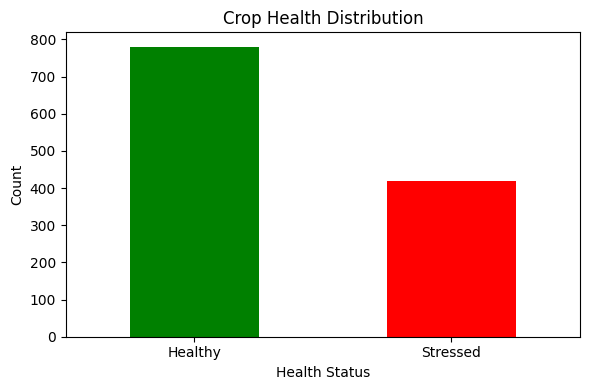

In [23]:
# Check target distribution
print("🏷️ Target Variable Distribution:")
print(df['crop_health_label'].value_counts())

# Visualize
plt.figure(figsize=(6, 4))
df['crop_health_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Crop Health Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---

## 🌿 Understanding Vegetation Indices

### What are Vegetation Indices?

Numbers calculated from different **light colors** that plants reflect. Like taking a plant's "temperature" with light!

### Key Indices in Our Dataset

| Index | Full Name | What It Measures | Healthy Value |
|-------|-----------|-----------------|---------------|
| **NDVI** | Normalized Difference Vegetation Index | Plant greenness | 0.6 - 0.9 |
| **GNDVI** | Green NDVI | Chlorophyll content | 0.5 - 0.8 |
| **SAVI** | Soil Adjusted Vegetation Index | Greenness (corrected for soil) | 0.4 - 0.7 |
| **EVI** | Enhanced Vegetation Index | Greenness (works in dense areas) | 0.3 - 0.8 |
| **Red Edge** | Red Edge Reflectance | Early stress detection | Varies |
| **Moisture** | Moisture Index | Water content | Higher = wetter |

### Real-Life Analogy

Think of NDVI like a **"health score"** for plants:
- 📗 **High NDVI (0.6-0.9)**: Plant is super healthy, like an A+ student
- 📙 **Medium NDVI (0.3-0.6)**: Plant is okay, like a C student
- 📕 **Low NDVI (0.0-0.3)**: Plant is struggling, needs help!


---

## 🧹 Data Preprocessing

### What is Preprocessing?

Preparing the data so the ML model can understand it:
1. **Select Features (X)**: What the model learns FROM
2. **Select Target (y)**: What the model learns TO PREDICT
3. **Encode Labels**: Convert text to numbers

### Feature Selection Explained

We select columns that contain **useful information** for prediction.

**We USE:**
- Vegetation indices (NDVI, GNDVI, etc.)
- Reflectance values
- Moisture and canopy density

**We DON'T USE:**
- `grid_x`, `grid_y` (location, not health info)
- `crop_health_label` (that's what we're predicting!)


In [24]:
# ==============================================================================
# DATA PREPROCESSING
# ==============================================================================

# Check for missing values
print("🔍 Checking for missing values...")
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")

# Define feature columns (what the model learns from)
FEATURE_COLUMNS = [
    'ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max',
    'gndvi', 'savi', 'evi',
    'red_edge_1', 'red_edge_2',
    'nir_reflectance', 'soil_brightness',
    'canopy_density', 'moisture_index'
]

print(f"\n📊 Using {len(FEATURE_COLUMNS)} features for prediction")
for i, col in enumerate(FEATURE_COLUMNS, 1):
    print(f"   {i}. {col}")

🔍 Checking for missing values...
Total missing values: 0

📊 Using 13 features for prediction
   1. ndvi_mean
   2. ndvi_std
   3. ndvi_min
   4. ndvi_max
   5. gndvi
   6. savi
   7. evi
   8. red_edge_1
   9. red_edge_2
   10. nir_reflectance
   11. soil_brightness
   12. canopy_density
   13. moisture_index


### 🎯 Creating X (Features) and y (Target)

| Variable | What It Contains | Shape |
|----------|-----------------|-------|
| **X** | All feature columns (vegetation indices) | (rows, 13) |
| **y** | Target column (Healthy/Stressed) | (rows,) |

### Label Encoding

ML models need **numbers**, not text:
- "Healthy" → 0
- "Stressed" → 1

This is called **Label Encoding**.


In [25]:
# Create feature matrix X
X = df[FEATURE_COLUMNS]
print(f"✅ Feature matrix X shape: {X.shape}")

# Create target variable y
y = df['crop_health_label']
print(f"✅ Target variable y shape: {y.shape}")

# Encode labels (text → numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n🏷️ Label Encoding:")
print(f"   Classes: {label_encoder.classes_}")
print(f"   Mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

✅ Feature matrix X shape: (1200, 13)
✅ Target variable y shape: (1200,)

🏷️ Label Encoding:
   Classes: ['Healthy' 'Stressed']
   Mapping: {'Healthy': 0, 'Stressed': 1}


---

## ✂️ Train-Test Split

### What is Train-Test Split?

Dividing data into two parts:
- **Training Set (80%)**: Model learns patterns from this
- **Testing Set (20%)**: Model is evaluated on this (unseen data)

### Why Do We Split?

**Analogy**: Studying for an exam
- 📚 **Training**: Studying with practice questions
- 📝 **Testing**: Taking the actual exam (different questions!)

If you memorize the practice answers, you might fail the real exam!

### Parameters Explained

| Parameter | Value | Meaning |
|-----------|-------|--------|
| `test_size` | 0.2 | 20% for testing |
| `random_state` | 42 | Same split every run |
| `stratify` | y | Keep class proportions |


In [26]:
# ==============================================================================
# TRAIN-TEST SPLIT
# ==============================================================================

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,       # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y_encoded   # Keep class balance
)
print("✂️ Train-Test Split Complete!")
print(f"   Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


✂️ Train-Test Split Complete!
   Training samples: 960 (80.0%)
   Testing samples: 240 (20.0%)


---

## 🤖 Task 2: Machine Learning Model

### What is Random Forest?

A **Random Forest** is like asking 100 experts to vote:
1. Each expert (tree) looks at the data differently
2. Each expert makes a prediction
3. Final answer = majority vote

### Why Random Forest?

| Advantage | Explanation |
|-----------|-------------|
| **Accurate** | Multiple trees = better predictions |
| **Robust** | Doesn't easily overfit |
| **Handles Many Features** | Works well with 13 vegetation indices |
| **Shows Feature Importance** | Tells us which indices matter most |

### Parameters Explained

| Parameter | Value | Meaning |
|-----------|-------|--------|
| `n_estimators` | 100 | Number of trees in forest |
| `max_depth` | 10 | Maximum tree depth |
| `random_state` | 42 | Reproducibility |
| `n_jobs` | -1 | Use all CPU cores |


In [27]:
# ==============================================================================
# MODEL TRAINING
# ==============================================================================

print("🌲 Creating Random Forest Classifier...")

# Create the model
model = RandomForestClassifier(
    n_estimators=100,    # 100 decision trees
    max_depth=10,        # Maximum tree depth
    random_state=42,     # Reproducibility
    n_jobs=-1            # Use all CPU cores
)

print("🎓 Training model...")

# Train the model
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

🌲 Creating Random Forest Classifier...
🎓 Training model...
✅ Model trained successfully!


---

## 📊 Model Evaluation

### Evaluation Metrics Explained

| Metric | What It Measures | Simple Explanation |
|--------|-----------------|--------------------|
| **Accuracy** | Overall correctness | % of correct predictions |
| **Precision** | Quality of positive predictions | When model says "Stressed", how often is it right? |
| **Recall** | Coverage of actual positives | Of all stressed crops, how many did model find? |
| **F1-Score** | Balance of Precision & Recall | Harmonic mean of both |
| **ROC-AUC** | Overall model quality | 0-1 scale, higher is better |

### Confusion Matrix

Shows where the model is right and wrong:

```
              Predicted
              Healthy  Stressed
Actual Healthy    TP      FP
       Stressed   FN      TN
```

- **TP**: True Positive (correctly predicted Healthy)
- **TN**: True Negative (correctly predicted Stressed)
- **FP**: False Positive (said Healthy, was Stressed)
- **FN**: False Negative (said Stressed, was Healthy)


In [28]:
# ==============================================================================
# MODEL EVALUATION
# ==============================================================================

print("📊 Evaluating model on test data...")

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("\n" + "-" * 50)
print("📋 CLASSIFICATION REPORT")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"📈 ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

📊 Evaluating model on test data...

--------------------------------------------------
📋 CLASSIFICATION REPORT
--------------------------------------------------
              precision    recall  f1-score   support

     Healthy       0.93      0.97      0.95       156
    Stressed       0.94      0.87      0.90        84

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.93       240
weighted avg       0.93      0.93      0.93       240

📈 ROC-AUC Score: 0.9797

📊 Confusion Matrix:
[[151   5]
 [ 11  73]]


### 📊 Confusion Matrix Visualization

A visual representation makes it easier to see:
- **Diagonal values**: Correct predictions (want these HIGH)
- **Off-diagonal values**: Mistakes (want these LOW)


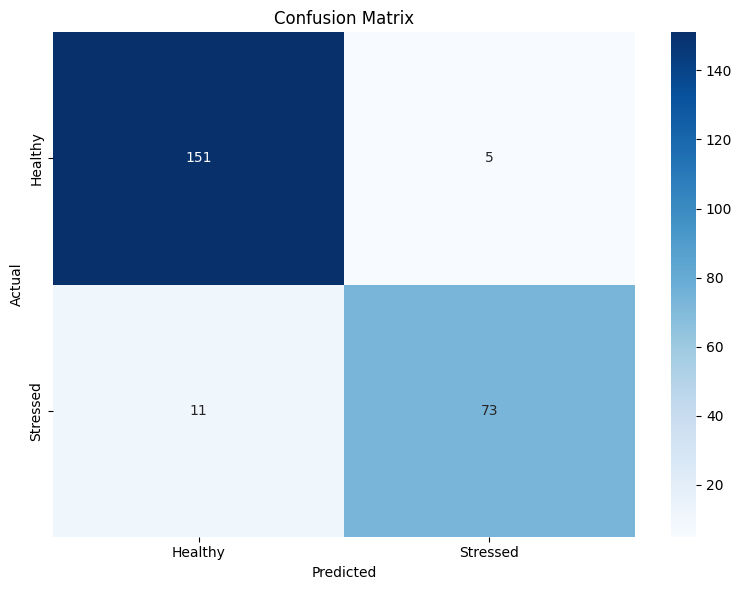

✅ Saved to ../outputs/confusion_matrix.png


In [29]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/confusion_matrix.png', dpi=150)
plt.show()
print(f"✅ Saved to {OUTPUT_DIR}/confusion_matrix.png")

---

## 🔑 Feature Importance

### What is Feature Importance?

Shows which vegetation indices **matter most** for predicting crop health.

### Why is This Useful?

- **Agronomists**: Know which measurements to focus on
- **Drone Operators**: Optimize sensor settings
- **Researchers**: Understand plant stress indicators

### How is it Calculated?

Random Forest measures how much each feature helps split the data correctly.
Higher importance = feature is more useful for prediction.


🔑 Feature Importance (Most to Least Important):
        Feature  Importance
            evi    0.153398
 canopy_density    0.152919
          gndvi    0.125360
      ndvi_mean    0.125297
 moisture_index    0.100392
           savi    0.084289
       ndvi_max    0.078350
       ndvi_min    0.074468
nir_reflectance    0.025048
soil_brightness    0.023989
     red_edge_1    0.019692
       ndvi_std    0.018946
     red_edge_2    0.017853


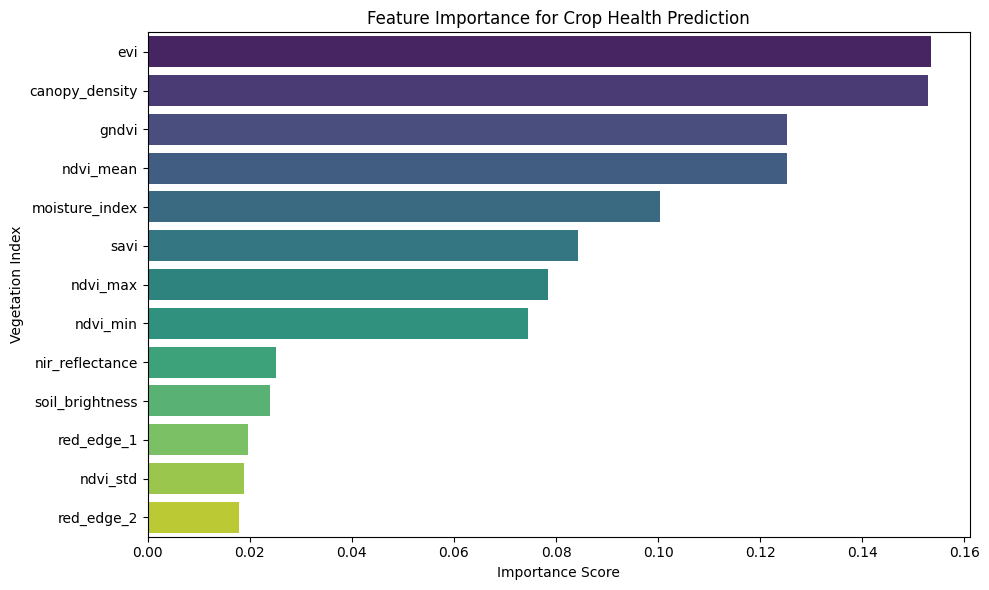

✅ Saved to ../outputs/feature_importance.png


In [30]:
# ==============================================================================
# FEATURE IMPORTANCE
# ==============================================================================

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': FEATURE_COLUMNS,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🔑 Feature Importance (Most to Least Important):")
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Crop Health Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Vegetation Index')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/feature_importance.png', dpi=150)
plt.show()
print(f"✅ Saved to {OUTPUT_DIR}/feature_importance.png")

---

## 🗺️ Task 3: Spatial Analysis & Visualization

### What is Spatial Analysis?

Looking at **WHERE** in the field the stress is occurring, not just IF it exists.

### What is a Heatmap?

A color-coded map showing:
- 🟢 **Green**: Healthy areas
- 🟡 **Yellow**: Moderate stress
- 🔴 **Red**: High stress areas

### Why is This Important?

Farmers can see **exactly where** problems are, not just that problems exist!


In [34]:
# ==============================================================================
# SPATIAL ANALYSIS
# ==============================================================================

print("🗺️ Generating predictions for all grid cells...")

# Predict for entire dataset
all_predictions = model.predict(X)
all_proba = model.predict_proba(X)[:, 1]

# Add predictions to dataframe
df['predicted_label'] = label_encoder.inverse_transform(all_predictions)
df['stress_probability'] = all_proba

# Calculate statistics
stress_count = (df['predicted_label'] == 'Stressed').sum()
healthy_count = (df['predicted_label'] == 'Healthy').sum()
total = len(df)

print(f"\n📊 Field Health Summary:")
print(f"   Total grid cells: {total}")
print(f"   🟢 Healthy: {healthy_count} ({healthy_count/total*100:.1f}%)")
print(f"   🔴 Stressed: {stress_count} ({stress_count/total*100:.1f}%)")

🗺️ Generating predictions for all grid cells...

📊 Field Health Summary:
   Total grid cells: 1200
   🟢 Healthy: 786 (65.5%)
   🔴 Stressed: 414 (34.5%)


### 🗺️ Creating the Stress Heatmap

We use `pivot_table` to convert our data into a grid format:
- **Rows**: Y coordinates (South to North)
- **Columns**: X coordinates (West to East)
- **Values**: Stress probability (0 = Healthy, 1 = Stressed)


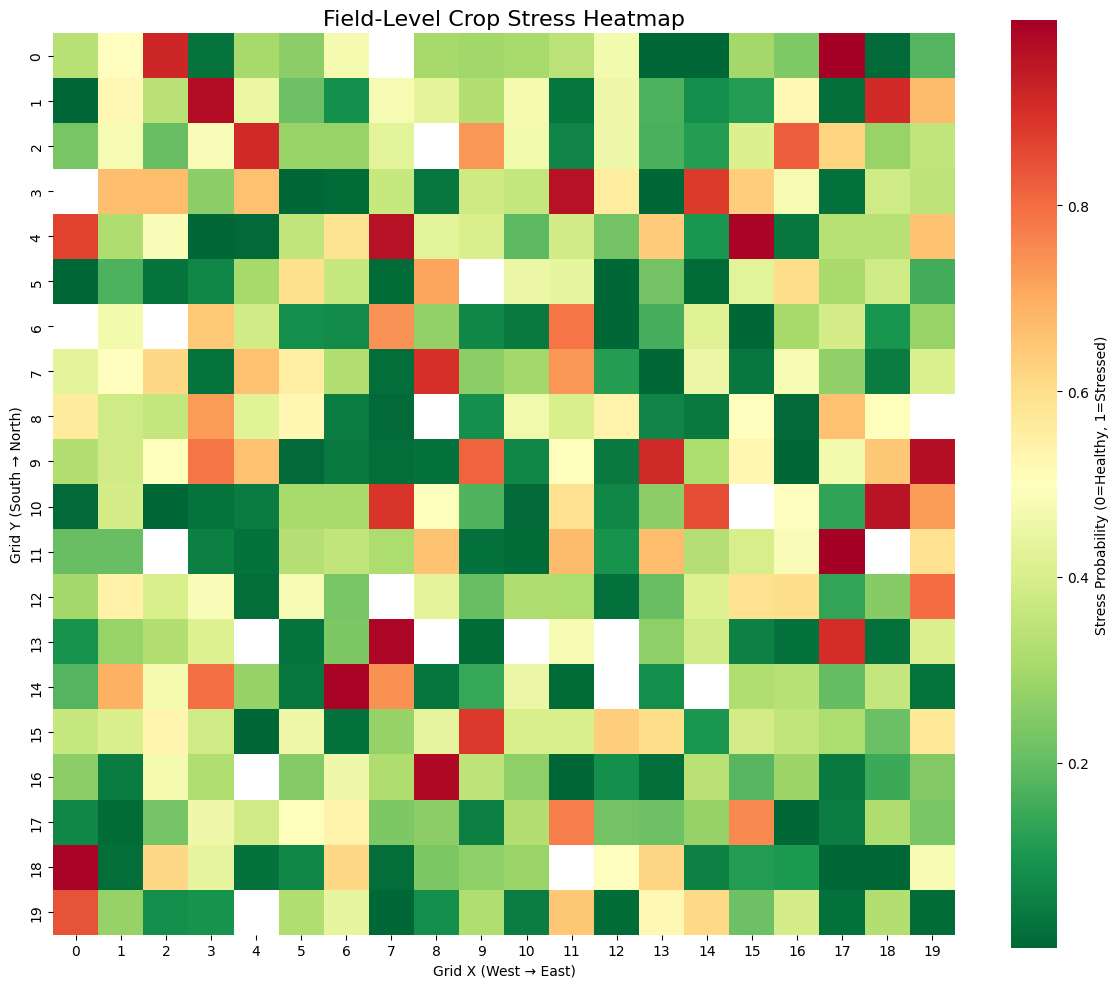

✅ Saved to ../outputs/stress_heatmap.png


In [35]:
# Create pivot table for heatmap
heatmap_data = df.pivot_table(
    values='stress_probability',
    index='grid_y',
    columns='grid_x',
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',  # Red=stressed, Green=healthy
    cbar_kws={'label': 'Stress Probability (0=Healthy, 1=Stressed)'},
    square=True
)
plt.title('Field-Level Crop Stress Heatmap', fontsize=16)
plt.xlabel('Grid X (West → East)')
plt.ylabel('Grid Y (South → North)')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/stress_heatmap.png', dpi=150)
plt.show()
print(f"✅ Saved to {OUTPUT_DIR}/stress_heatmap.png")

---

## 🚁 Task 4: Drone & Agronomy Interpretation

### What are Drone Recommendations?

Based on our stress predictions, we suggest:
- **Where** to fly the drone
- **How quickly** to inspect each area
- **What action** to take

### Stress Categories

| Category | Probability | Priority | Action |
|----------|------------|----------|--------|
| 🔴 Critical | > 75% | VERY HIGH | Inspect within 24 hours |
| 🟠 High | 50-75% | HIGH | Inspect within 3 days |
| 🟡 Medium | 25-50% | MEDIUM | Weekly monitoring |
| 🟢 Low | < 25% | LOW | Routine bi-weekly |


In [36]:
# ==============================================================================
# DRONE RECOMMENDATIONS
# ==============================================================================

def categorize_stress(prob):
    """Categorize stress level based on probability."""
    if prob < 0.25:
        return 'Low (Healthy)'
    elif prob < 0.50:
        return 'Medium'
    elif prob < 0.75:
        return 'High'
    else:
        return 'Critical'

df['stress_category'] = df['stress_probability'].apply(categorize_stress)

print("📊 Stress Category Distribution:")
category_counts = df['stress_category'].value_counts()
print(category_counts)

print("\n" + "=" * 50)
print("🚁 DRONE INSPECTION RECOMMENDATIONS")
print("=" * 50)
print("""
🔴 CRITICAL STRESS AREAS:
   - Immediate inspection required (within 24 hours)
   - Low-altitude detailed imagery

🟠 HIGH STRESS AREAS:
   - Schedule inspection within 3 days
   - Standard multispectral survey

🟡 MEDIUM STRESS AREAS:
   - Include in weekly routine
   - Regular monitoring flight

🟢 LOW STRESS / HEALTHY AREAS:
   - Bi-weekly monitoring
   - Routine surveillance only
""")

📊 Stress Category Distribution:
stress_category
Low (Healthy)    749
Critical         372
High              42
Medium            37
Name: count, dtype: int64

🚁 DRONE INSPECTION RECOMMENDATIONS

🔴 CRITICAL STRESS AREAS:
   - Immediate inspection required (within 24 hours)
   - Low-altitude detailed imagery

🟠 HIGH STRESS AREAS:
   - Schedule inspection within 3 days
   - Standard multispectral survey

🟡 MEDIUM STRESS AREAS:
   - Include in weekly routine
   - Regular monitoring flight

🟢 LOW STRESS / HEALTHY AREAS:
   - Bi-weekly monitoring
   - Routine surveillance only



---

## 📝 Task 5: Reflection

### What Did We Learn?

1. Vegetation indices can predict crop health
2. Random Forest works well for this classification task
3. Spatial visualization helps farmers take action

### Limitations of This Approach

| Limitation | Impact | Solution |
|------------|--------|----------|
| Single time snapshot | No seasonal trends | Multi-temporal analysis |
| One field/region | May not generalize | Train on diverse data |
| No ground validation | Predictions not verified | Field inspections |


In [24]:
# ==============================================================================
# REFLECTION
# ==============================================================================

print("📝 PROJECT REFLECTION")
print("=" * 50)

print("""
LIMITATIONS:
1. Single time snapshot - no seasonal variation
2. Geographic specificity - may not transfer to other regions
3. No ground truth validation
4. Single crop type assumed

PROPOSED IMPROVEMENTS:
1. Multi-temporal analysis (track changes over time)
2. Include weather and soil data
3. Try advanced models (XGBoost, Neural Networks)
4. Field validation of predictions
5. Integrate with irrigation systems
""")

📝 PROJECT REFLECTION

LIMITATIONS:
1. Single time snapshot - no seasonal variation
2. Geographic specificity - may not transfer to other regions
3. No ground truth validation
4. Single crop type assumed

PROPOSED IMPROVEMENTS:
1. Multi-temporal analysis (track changes over time)
2. Include weather and soil data
3. Try advanced models (XGBoost, Neural Networks)
4. Field validation of predictions
5. Integrate with irrigation systems



---

## 🏆 Project Summary

### What We Accomplished

1. ✅ Loaded and explored vegetation index data
2. ✅ Trained a Random Forest classifier
3. ✅ Evaluated model with multiple metrics
4. ✅ Created a field-level stress heatmap
5. ✅ Generated drone inspection recommendations

### Key Outputs

| Output | Location |
|--------|----------|
| Confusion Matrix | `outputs/confusion_matrix.png` |
| Feature Importance | `outputs/feature_importance.png` |
| Stress Heatmap | `outputs/stress_heatmap.png` |

### 🌱 Thank you for learning AI Crop Health Monitoring!


In [37]:
# Final summary
print("=" * 60)
print("🏆 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)
print(f"""
📊 MODEL PERFORMANCE:
   ROC-AUC Score: {roc_auc:.4f}

🌾 FIELD HEALTH STATUS:
   🟢 Healthy: {healthy_count} areas ({healthy_count/total*100:.1f}%)
   🔴 Stressed: {stress_count} areas ({stress_count/total*100:.1f}%)

🎯 NEXT STEPS:
   1. Review the stress heatmap
   2. Prioritize drone inspections
   3. Plan interventions for stressed areas
""")
print("=" * 60)
print("🌱 Thank you for using AI Crop Health Monitoring!")
print("=" * 60)

🏆 PROJECT COMPLETED SUCCESSFULLY!

📊 MODEL PERFORMANCE:
   ROC-AUC Score: 0.9797

🌾 FIELD HEALTH STATUS:
   🟢 Healthy: 786 areas (65.5%)
   🔴 Stressed: 414 areas (34.5%)

🎯 NEXT STEPS:
   1. Review the stress heatmap
   2. Prioritize drone inspections
   3. Plan interventions for stressed areas

🌱 Thank you for using AI Crop Health Monitoring!
